### Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.

In [ ]:
#Data reading and visaulizing tools
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline

#preprocessing tools
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.tree import export_text, plot_tree,export_graphviz

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#additional tools
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

from sklearn import set_config
set_config(display='diagram')

In [ ]:
churn=pd.read_csv('/content/drive/MyDrive/SVM/telecom_churn.csv')

In [ ]:
#churn data
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
churn.shape

(3333, 20)

### EDA

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# checking missing values
churn.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

No missing values

In [ ]:
churn['State'].nunique()

51

In [ ]:
churn['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
churn['Churn'].unique()

array([False,  True])

In [ ]:
#checking balanced or imbalnced classes 
sum(churn['Churn']==False),sum(churn['Churn']==True)

(2850, 483)

The dataset is imbalanced

### Data Visualization

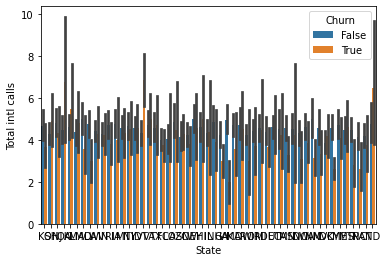

In [ ]:
sns.barplot(data=churn,x ='State',y='Total intl calls', hue='Churn')

### Prepare the data

In [ ]:
X= churn.drop(['State','Churn'], axis=1)
y=churn['Churn']

### Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Transformers

In [ ]:
transformer=make_column_transformer((OneHotEncoder(),make_column_selector(dtype_include='object')),
                                   remainder=StandardScaler())
extractor = SelectFromModel(LogisticRegression(penalty='l2', solver ='lbfgs' ,random_state = 42,))

### Pipelines for each models

In [ ]:
#K nearst neighbor pipelines
knn_pipe=Pipeline(
    steps=[('transformer',transformer),
          ('knn', KNeighborsClassifier())]
)

#Decision tree pipelines
dtree_pipe=Pipeline(
    steps=[('transformer',transformer),
           ('dtree',DecisionTreeClassifier())]
)

#logestic regression pipelines 
lgr_pipe=Pipeline(
    steps=[('transformer',transformer),
           ('selector',extractor),
           ('lrg',LogisticRegression())]
)

#Support Vector Machine pipelines
svc_pipe=Pipeline(
    steps=[('transformer',transformer),
          ('svc',SVC())]
)

### Tunning Hyperparameters for KNN,DecisionTree,and SVM

In [ ]:
math.sqrt(3333)

57.73214009544424

In [ ]:
#K nearst neibour hyperparamers dictionary
knn_params={'knn__n_neighbors':range(1,99,2),
        'knn__weights':['uniform','distance'],
        'knn__p':[1,2]}

#Decision tree hyperparamers dictionary
dtree_params = {'dtree__max_depth':[2,4,6],
                'dtree__min_samples_split':[0.1, 0.2, 0.05],
                'dtree__criterion': ['gini','entropy'],
                'dtree__min_samples_leaf':[1,2,3]
         }


#Support vector machine hyperparamers dictionary
#svc_params= {'svc__kernel': ['rbf', 'poly', 'linear','Sigmoid'],
              #'svc__gamma': [0.1, 1.0,10.0],
              #'svc__coef0':[0,1,2],
              #'svc__degree':[2,3,4]}
#Support vector machine hyperparamers dictionary
svc_params= {'svc__kernel': ['rbf','linear','sigmoid'],
              'svc__gamma': [0.1, 1.0,10.0],
              'svc__coef0':[0,1,2]}

svc_poly_params= {'svc__kernel': ['poly','linear'],
              'svc__gamma': [0.1, 1.0,10.0],
              'svc__coef0':[0,1,2],
              'svv__degree':[2,3,4]}
              

### GridSearchCV for each models

### K nearest Neighbor model

In [ ]:
# K Nearst neighbor gridsearch
#The time.time() is a method of Time module that is used to get the time in seconds since the epoch.
start_time=time.time()
knn_grid=GridSearchCV(estimator=knn_pipe,
                      param_grid=knn_params,
                     cv=5)
knn=knn_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time - start_time)

58.1618390083313


In [ ]:
knn.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b16fd8370>)])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
knn.best_params_

{'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'uniform'}

In [ ]:
knn.best_score_

0.8825431252355

In [ ]:
knn.classes_

array([False,  True])

In [ ]:
#knn.cv_results_

### DecisionTree Model

In [ ]:
#Decision Tree
#%time
start_time = time.time()
dtree_grid=GridSearchCV(estimator=dtree_pipe,
                      param_grid=dtree_params,
                      cv=5)
dtree=dtree_grid.fit(X_train,y_train)
end_time = time.time()
print(end_time - start_time)

7.561201572418213


In [ ]:
dtree.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b1983d670>)])),
                ('dtree',
                 DecisionTreeClassifier(max_depth=6, min_samples_split=0.05))])

In [ ]:
dtree.best_params_

{'dtree__criterion': 'gini',
 'dtree__max_depth': 6,
 'dtree__min_samples_leaf': 1,
 'dtree__min_samples_split': 0.05}

In [ ]:
dtree.best_score_

0.9318543161996491

In [ ]:
dtree.classes_

array([False,  True])

In [ ]:
#dtree.cv_results_

### Logestic Regression

In [ ]:
start_time=time.time()
lgr_model=lgr_pipe.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

0.07503080368041992


In [ ]:
lgr_model.classes_

array([False,  True])

In [ ]:
feature_names=lgr_model.named_steps['transformer'].get_feature_names_out()
feature_names

array(['onehotencoder__International plan_No',
       'onehotencoder__International plan_Yes',
       'onehotencoder__Voice mail plan_No',
       'onehotencoder__Voice mail plan_Yes', 'remainder__Account length',
       'remainder__Area code', 'remainder__Number vmail messages',
       'remainder__Total day minutes', 'remainder__Total day calls',
       'remainder__Total day charge', 'remainder__Total eve minutes',
       'remainder__Total eve calls', 'remainder__Total eve charge',
       'remainder__Total night minutes', 'remainder__Total night calls',
       'remainder__Total night charge', 'remainder__Total intl minutes',
       'remainder__Total intl calls', 'remainder__Total intl charge',
       'remainder__Customer service calls'], dtype=object)

In [ ]:
selected_features=lgr_pipe.named_steps['selector'].get_feature_names_out()  # selected features
selected_features

array(['x0', 'x1', 'x2', 'x3', 'x7', 'x9', 'x19'], dtype=object)

In [ ]:
selected_features =feature_names[[int(i[1:]) for i in selected_features]]
selected_features

array(['onehotencoder__International plan_No',
       'onehotencoder__International plan_Yes',
       'onehotencoder__Voice mail plan_No',
       'onehotencoder__Voice mail plan_Yes',
       'remainder__Total day minutes', 'remainder__Total day charge',
       'remainder__Customer service calls'], dtype=object)

In [ ]:
clean_names = [i.split('__')[-1] for i in selected_features]
clean_names

['International plan_No',
 'International plan_Yes',
 'Voice mail plan_No',
 'Voice mail plan_Yes',
 'Total day minutes',
 'Total day charge',
 'Customer service calls']

In [ ]:
coefs=lgr_pipe.named_steps['lrg'].coef_[0]
coefs

array([-1.04298226,  1.0428128 ,  0.40898154, -0.409151  ,  0.29790659,
        0.3056387 ,  0.63520512])

In [ ]:
coef_df = pd.DataFrame({'feature': clean_names, 'coefs':coefs})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)
coef_df

,feature,coefs
0,International plan_No,1.042982
1,International plan_Yes,1.042813
6,Customer service calls,0.635205
3,Voice mail plan_Yes,0.409151
2,Voice mail plan_No,0.408982
5,Total day charge,0.305639
4,Total day minutes,0.297907


In [ ]:
lgr_model.score(X_train,y_train)

0.8555507929704244

In [ ]:
lgr_model.score(X_test,y_test)

0.857

### SVM Modle

In [ ]:
start_time=time.time()
svc_grid=GridSearchCV(estimator=svc_pipe,
                      param_grid=svc_params,
                      cv=5)
svm=svc_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

23.075573682785034


In [ ]:
 svm.best_estimator_         

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b1983d880>)])),
                ('svc', SVC(coef0=0, gamma=0.1))])

In [ ]:
svm.best_params_

{'svc__coef0': 0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [ ]:
svm.best_score_

0.8958349799193096

In [ ]:
svm.classes_

array([False,  True])

In [ ]:
#svm.cv_results_

In [ ]:
features_name=svm.best_estimator_['transformer'].get_feature_names_out()
features_name

array(['onehotencoder__International plan_No',
       'onehotencoder__International plan_Yes',
       'onehotencoder__Voice mail plan_No',
       'onehotencoder__Voice mail plan_Yes', 'remainder__Account length',
       'remainder__Area code', 'remainder__Number vmail messages',
       'remainder__Total day minutes', 'remainder__Total day calls',
       'remainder__Total day charge', 'remainder__Total eve minutes',
       'remainder__Total eve calls', 'remainder__Total eve charge',
       'remainder__Total night minutes', 'remainder__Total night calls',
       'remainder__Total night charge', 'remainder__Total intl minutes',
       'remainder__Total intl calls', 'remainder__Total intl charge',
       'remainder__Customer service calls'], dtype=object)

In [ ]:
features_name[0].split('__')[-1]

'International plan_No'

In [ ]:
#svm only linear and poly kernels
start_time=time.time()
svc_poly_grid=GridSearchCV(estimator=svc_pipe,
                      param_grid=svc_poly_params,
                      cv=5)
svm_poly=svc_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

23.610329389572144


In [ ]:
svm_poly.best_score_

0.8958349799193096

### Evaluating model performance

K Nearest Neighbors (KNN)

In [ ]:
train_knn_pred=knn.predict(X_train)
test_knn_pred = knn.predict(X_test)
train_knn_confusion=confusion_matrix(y_train,train_knn_pred)
test_knn_confusion=confusion_matrix(y_test,test_knn_pred)

In [ ]:
print(classification_report(y_train,train_knn_pred))

              precision    recall  f1-score   support

       False       0.92      0.99      0.96      1993
        True       0.94      0.49      0.65       340

    accuracy                           0.92      2333
   macro avg       0.93      0.74      0.80      2333
weighted avg       0.92      0.92      0.91      2333



In [ ]:
print(classification_report(y_test,test_knn_pred))

              precision    recall  f1-score   support

       False       0.89      0.98      0.94       857
        True       0.75      0.28      0.41       143

    accuracy                           0.88      1000
   macro avg       0.82      0.63      0.67      1000
weighted avg       0.87      0.88      0.86      1000



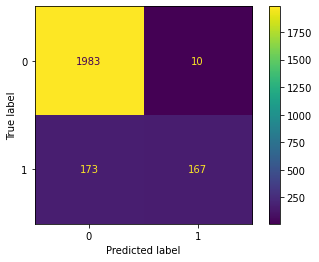

In [ ]:
disp_train_knn=ConfusionMatrixDisplay(train_knn_confusion)
disp_train_knn.plot()
plt.show()

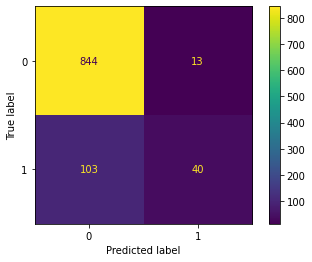

In [ ]:
disp_test_knn=ConfusionMatrixDisplay(test_knn_confusion)
disp_test_knn.plot()
plt.show()

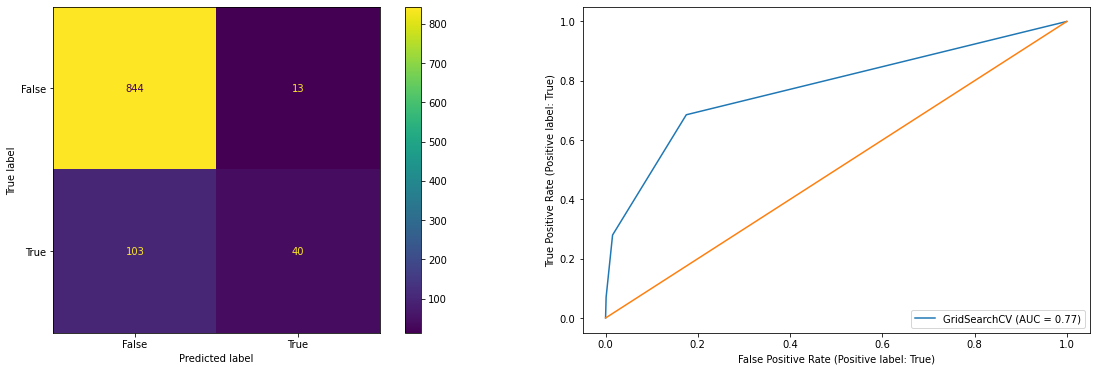

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [ ]:
train_accurcy_score=accuracy_score(train_knn_pred,y_train)
test_accuracy_score=accuracy_score(test_knn_pred,y_test)
train_accurcy_score,test_accuracy_score

(0.9215602228889841, 0.884)

In [ ]:
train_precision_score=precision_score(y_train,train_knn_pred,average='macro')
test_precision_score=precision_score(y_test,test_knn_pred,average='macro')
train_precision_score,test_precision_score

(0.9316308187373563, 0.8229762307983504)

In [ ]:
train_precision_score=precision_score(y_train,train_knn_pred,average='weighted')
test_precision_score=precision_score(y_test,test_knn_pred,average='weighted')
train_precision_score,test_precision_score

(0.9232191487336376, 0.8717133350600704)

In [ ]:
train_recall_score=recall_score(y_train,train_knn_pred,average='macro')
test_recall_score=recall_score(y_test,test_knn_pred,average='macro')
train_recall_score,test_recall_score

(0.7430794545615537, 0.6322755424272344)

In [ ]:
train_recall_score=recall_score(y_train,train_knn_pred,average='weighted')
test_recall_score=recall_score(y_test,test_knn_pred,average='weighted')
train_recall_score,test_recall_score

(0.9215602228889841, 0.884)

### DecisionTree model

In [ ]:
train_dtree_pred=dtree.predict(X_train)
test_dtree_pred=dtree.predict(X_test)

In [ ]:
print(classification_report(y_train,train_dtree_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96      1993
        True       0.83      0.70      0.76       340

    accuracy                           0.94      2333
   macro avg       0.89      0.84      0.86      2333
weighted avg       0.93      0.94      0.93      2333



In [ ]:
print(classification_report(y_test,test_dtree_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96       857
        True       0.83      0.70      0.76       143

    accuracy                           0.94      1000
   macro avg       0.89      0.84      0.86      1000
weighted avg       0.93      0.94      0.93      1000



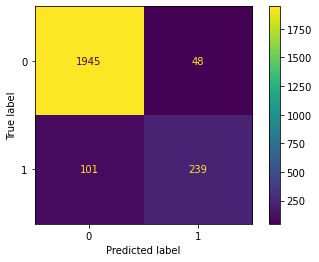

In [ ]:
train_dtree_confusion=confusion_matrix(y_train,train_dtree_pred)
disp_train_dtree=ConfusionMatrixDisplay(train_dtree_confusion)
disp_train_dtree.plot()
plt.show()

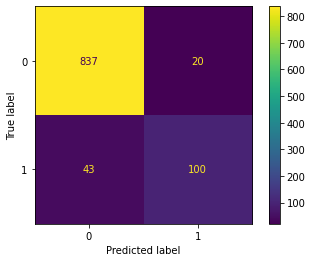

In [ ]:
test_dtree_confusion=confusion_matrix(y_test,test_dtree_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_dtree_confusion)
disp_test_dtree.plot()
plt.show()

In [ ]:
dtree_train_accurcy_score=accuracy_score(train_dtree_pred,y_train)
dtree_test_accuracy_score=accuracy_score(test_dtree_pred,y_test)
dtree_train_accurcy_score,dtree_test_accuracy_score

(0.9361337333904843, 0.937)

In [ ]:
dtree_train_precision_score=precision_score(train_dtree_pred,y_train,average='macro')
dtree_test_precision_score=precision_score(test_dtree_pred,y_test,average='macro')
dtree_train_precision_score,dtree_test_precision_score

(0.839428440718987, 0.8379817382151105)

In [ ]:
dtree_train_precision_score=precision_score(train_dtree_pred,y_train,average='weighted')
dtree_test_precision_score=precision_score(test_dtree_pred,y_test,average='weighted')
dtree_train_precision_score,dtree_test_precision_score

(0.9423350407245307, 0.943379327790063)

In [ ]:
dtree_train_recall_score=recall_score(train_dtree_pred,y_train,average='macro')
dtree_test_recall_score=recall_score(test_dtree_pred,y_test,average='macro')
dtree_train_recall_score,dtree_test_recall_score

(0.8916939996798376, 0.8922348484848486)

In [ ]:
dtree_train_recall_score=recall_score(train_dtree_pred,y_train,average='weighted')
dtree_test_recall_score=recall_score(test_dtree_pred,y_test,average='weighted')
dtree_train_recall_score,dtree_test_recall_score

(0.9361337333904843, 0.937)

### Logestic Regression

In [ ]:
train_lgr_pred=lgr_model.predict(X_train)
test_lgr_pred=lgr_model.predict(X_test)

In [ ]:
print(classification_report(y_train,train_lgr_pred))

              precision    recall  f1-score   support

       False       0.87      0.98      0.92      1993
        True       0.51      0.15      0.24       340

    accuracy                           0.86      2333
   macro avg       0.69      0.56      0.58      2333
weighted avg       0.82      0.86      0.82      2333



In [ ]:
print(classification_report(y_test,test_lgr_pred))

              precision    recall  f1-score   support

       False       0.88      0.97      0.92       857
        True       0.50      0.19      0.27       143

    accuracy                           0.86      1000
   macro avg       0.69      0.58      0.60      1000
weighted avg       0.82      0.86      0.83      1000



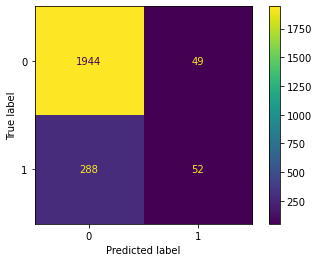

In [ ]:
train_lgr_confusion=confusion_matrix(y_train,train_lgr_pred)
disp_train_lgr=ConfusionMatrixDisplay(train_lgr_confusion)
disp_train_lgr.plot()
plt.show()

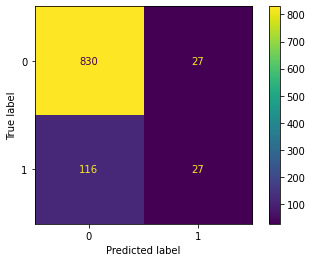

In [ ]:
test_lgr_confusion=confusion_matrix(y_test,test_lgr_pred)
disp_test_lgr=ConfusionMatrixDisplay(test_lgr_confusion)
disp_test_lgr.plot()
plt.show()

In [ ]:
lgr_train_accurcy_score=accuracy_score(train_lgr_pred,y_train)
lgr_test_accuracy_score=accuracy_score(test_lgr_pred,y_test)
lgr_train_accurcy_score,lgr_test_accuracy_score

(0.8555507929704244, 0.857)

In [ ]:
lgr_train_precision_score=precision_score(train_lgr_pred,y_train,average='macro')
lgr_test_precision_score=precision_score(test_lgr_pred,y_test,average='macro')
lgr_train_precision_score,lgr_test_precision_score

(0.5641775626457306, 0.5786529689680214)

In [ ]:
lgr_train_precision_score=precision_score(train_lgr_pred,y_train,average='weighted')
lgr_test_precision_score=precision_score(test_lgr_pred,y_test,average='weighted')
lgr_train_precision_score,lgr_test_precision_score

(0.9398075407594162, 0.9263918368679162)

In [ ]:
lgr_train_recall_score=recall_score(train_lgr_pred,y_train,average='macro')
lgr_test_recall_score=recall_score(test_lgr_pred,y_test,average='macro')
lgr_train_recall_score,lgr_test_recall_score

(0.6929096135419994, 0.6886892177589852)

In [ ]:
lgr_train_recall_score=recall_score(train_lgr_pred,y_train,average='weighted')
lgr_test_recall_score=recall_score(test_lgr_pred,y_test,average='weighted')
lgr_train_recall_score,lgr_test_recall_score

(0.8555507929704244, 0.857)

### Support Vector Machine (SVM)

In [ ]:
train_svc_pred=svm.predict(X_train)
test_svc_pred=svm.predict(X_test)

In [ ]:
print(classification_report(y_train,train_svc_pred))

              precision    recall  f1-score   support

       False       0.95      1.00      0.98      1993
        True       0.99      0.72      0.83       340

    accuracy                           0.96      2333
   macro avg       0.97      0.86      0.91      2333
weighted avg       0.96      0.96      0.96      2333



In [ ]:
print(classification_report(y_test,test_svc_pred))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96       857
        True       0.95      0.48      0.64       143

    accuracy                           0.92      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.92      0.92      0.91      1000



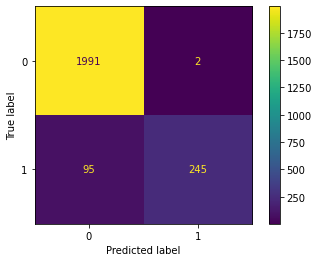

In [ ]:
train_svc_confusion=confusion_matrix(y_train,train_svc_pred)
disp_train_svc=ConfusionMatrixDisplay(train_svc_confusion)
disp_train_svc.plot()
plt.show()

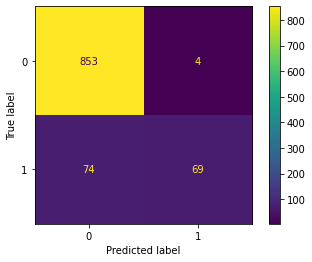

In [ ]:
test_svc_confusion=confusion_matrix(y_test,test_svc_pred)
disp_test_svc=ConfusionMatrixDisplay(test_svc_confusion)
disp_test_svc.plot()
plt.show()

In [ ]:
svc_train_accurcy_score=accuracy_score(train_svc_pred,y_train)
svc_test_accuracy_score=accuracy_score(test_svc_pred,y_test)
svc_train_accurcy_score,svc_test_accuracy_score

(0.9584226318045435, 0.922)

In [ ]:
svc_train_precision_score=precision_score(train_svc_pred,y_train,average='macro')
svc_test_precision_score=precision_score(test_svc_pred,y_test,average='macro')
svc_train_precision_score,svc_test_precision_score

(0.859792361500546, 0.7389250189716934)

In [ ]:
svc_train_precision_score=precision_score(train_svc_pred,y_train,average='weighted')
svc_test_precision_score=precision_score(test_svc_pred,y_test,average='weighted')
svc_train_precision_score,svc_test_precision_score

(0.9695207747425612, 0.9578970551035895)

In [ ]:
svc_train_recall_score=recall_score(train_svc_pred,y_train,average='macro')
svc_test_recall_score=recall_score(test_svc_pred,y_test,average='macro')
svc_train_recall_score,svc_test_recall_score

(0.9731805636962825, 0.9326890396181525)

In [ ]:
svc_train_recall_score=recall_score(train_svc_pred,y_train,average='weighted')
svc_test_recall_score=recall_score(test_svc_pred,y_test,average='weighted')
svc_train_recall_score,svc_test_recall_score

(0.9584226318045435, 0.922)

In [ ]:
#accuracy score
pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_accuracy_score':[train_accurcy_score,dtree_train_accurcy_score,lgr_train_accurcy_score,svc_train_accurcy_score],
              'test_accuracy_score':[test_accuracy_score,dtree_test_accuracy_score,lgr_test_accuracy_score,svc_test_accuracy_score],
              'average_fit_time':['58.1618390083313 sec','7.561201572418213 sec', '0.07503080368041992 sec','23.075573682785034 sec']})

,model,train_accuracy_score,test_accuracy_score,average_fit_time
0,KNN,0.921560,0.884,58.1618390083313 sec
1,Dtree,0.936134,0.937,7.561201572418213 sec
2,LGR,0.855551,0.857,0.07503080368041992 sec
3,SVM,0.958423,0.922,23.075573682785034 sec


In [ ]:
#precision score
pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_precision_score':[train_precision_score,dtree_train_precision_score,lgr_train_precision_score,svc_train_precision_score],
              'test_precision_score':[test_precision_score,dtree_test_precision_score,lgr_test_precision_score,svc_test_precision_score],
              'Time_Elapsed':['58.1618390083313 sec','7.561201572418213 sec', '0.07503080368041992 sec','23.075573682785034 sec']})

,model,train_precision_score,test_precision_score,Time_Elapsed
0,KNN,0.923219,0.871713,58.1618390083313 sec
1,Dtree,0.942335,0.943379,7.561201572418213 sec
2,LGR,0.939808,0.926392,0.07503080368041992 sec
3,SVM,0.969521,0.957897,23.075573682785034 sec


In [ ]:
#recall score
pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_recall_score':[train_recall_score,dtree_train_recall_score,lgr_train_recall_score,svc_train_recall_score],
              'test_recall_score':[test_recall_score,dtree_test_recall_score,lgr_test_recall_score,svc_test_recall_score],
              'Time_Elapsed':['58.1618390083313 sec','7.561201572418213 sec', '0.07503080368041992 sec','23.075573682785034 sec']})

,model,train_recall_score,test_recall_score,Time_Elapsed
0,KNN,0.921560,0.884,58.1618390083313 sec
1,Dtree,0.936134,0.937,7.561201572418213 sec
2,LGR,0.855551,0.857,0.07503080368041992 sec
3,SVM,0.958423,0.922,23.075573682785034 sec


The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.

In [ ]:
#importing a data set
from sklearn.datasets import load_digits
digits, labels = load_digits(return_X_y=True)

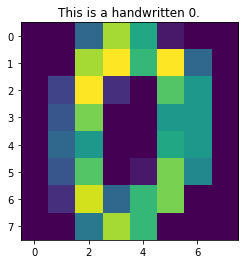

In [ ]:
#example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');

### Prepare the Data

In [ ]:
X=digits
y=labels

### Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X.shape

(1797, 64)

### Tunning hyperparameters

In [ ]:
math.sqrt(1797)

42.391036788453285

In [ ]:
#K nearst neibour hyperparamers dictionary
knn_params={'n_neighbors':range(1,69,2),
        'weights':['uniform','distance'],
        'p':[1,2]}

#Decision tree hyperparamers dictionary
dtree_params = {'max_depth':[2,4,6],
                'min_samples_split':[0.1, 0.2, 0.05],
                'criterion': ['gini','entropy'],
                'min_samples_leaf':[1,2,3]
         }
# Logestic Regression hyperparameters dictionary
lgr_params={'penalty':['l1', 'l2'],
            'solver':['lbfgs', 'liblinear']}
#Support vector machine hyperparamers dictionary
#svc_params= {'svc__kernel': ['rbf', 'poly', 'linear','Sigmoid'],
              #'svc__gamma': [0.1, 1.0,10.0],
              #'svc__coef0':[0,1,2],
              #'svc__degree':[2,3,4]}
#Support vector machine hyperparamers dictionary
svc_params= {'kernel': ['rbf','linear','sigmoid'],
              'gamma': [0.1, 1.0,10.0],
              'coef0':[0,1,2]}

svc_poly_params= {'kernel': ['poly','linear'],
              'gamma': [0.1, 1.0,10.0],
              'coef0':[0,1,2],
              'degree':[2,3,4]}

In [ ]:
LogisticRegression

### GridSearchCv

### K nearest neighbor Model

In [ ]:
# K Nearst neighbor gridsearch
start_time=time.time()
knn_grid=GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=knn_params,
                     cv=5)
knn_digit=knn_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time - start_time)

14.319875001907349


In [ ]:
knn_digit.best_score_

0.9864763169544046

In [ ]:
knn_digit.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### DecisionTree Model

In [ ]:
start_time = time.time()
dtree_grid=GridSearchCV(estimator=DecisionTreeClassifier(),
                      param_grid=dtree_params,
                      cv=5)
dtree_digits=dtree_grid.fit(X_train,y_train)
end_time = time.time()
print(f'Time in second:{end_time - start_time} sec')

Time in second:2.287346839904785 sec


In [ ]:
dtree_digits.best_score_

0.7955701005501803

In [ ]:
dtree_digits.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#dtree_digits.cv_results_

### Logestic Regression

In [ ]:
start_time=time.time()
lgr_grid=GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                      param_grid=lgr_params,
                      cv=5)
lgr_digits=lgr_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbf

27.216367959976196


In [ ]:
lgr_digits.best_score_

0.9522544741668248

In [ ]:
lgr_digits.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Support Vector Machine (SVM)

In [ ]:
start_time=time.time()
svc_grid=GridSearchCV(estimator=SVC(),
                      param_grid=svc_params,
                      cv=5)
svm_digits=svc_grid.fit(X_train,y_train)
end_time=time.time()
print(f'Time in Seconds:{end_time-start_time} sec')

Time in Seconds:12.138502597808838 sec


In [ ]:
svm_digits.best_score_

0.9681749193701386

In [ ]:
svm_digits.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Evaluating model performance

### K Nearest Neighbors (KNN)

In [ ]:
train_knn_pred=knn_digit.predict(X_train)
test_knn_pred = knn_digit.predict(X_test)
train_knn_confusion=confusion_matrix(y_train,train_knn_pred)
test_knn_confusion=confusion_matrix(y_test,test_knn_pred)

In [ ]:
print(classification_report(y_train,train_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



In [ ]:
print(classification_report(y_test,test_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.96      0.98      0.97        54
           4       0.98      0.98      0.98        60
           5       1.00      0.98      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.95      0.96        43
           9       0.95      0.95      0.95        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



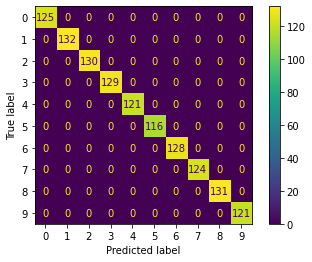

In [ ]:
disp_train_knn=ConfusionMatrixDisplay(train_knn_confusion)
disp_train_knn.plot()
plt.show()

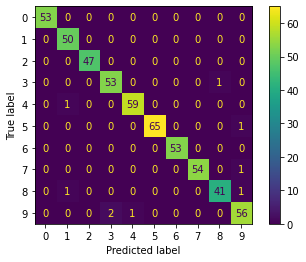

In [ ]:
disp_test_knn=ConfusionMatrixDisplay(test_knn_confusion)
disp_test_knn.plot()
plt.show()

In [ ]:
train_accurcy_score=accuracy_score(train_knn_pred,y_train)
test_accuracy_score=accuracy_score(test_knn_pred,y_test)
train_accurcy_score,test_accuracy_score

(1.0, 0.9833333333333333)

In [ ]:
train_precision_score=precision_score(y_train,train_knn_pred,average='macro')
test_precision_score=precision_score(y_test,test_knn_pred,average='macro')
train_precision_score,test_precision_score

(1.0, 0.9833851177071515)

In [ ]:
train_precision_score=precision_score(y_train,train_knn_pred,average='weighted')
test_precision_score=precision_score(y_test,test_knn_pred,average='weighted')
train_precision_score,test_precision_score

(1.0, 0.9834990318323652)

In [ ]:
train_recall_score=recall_score(y_train,train_knn_pred,average='macro')
test_recall_score=recall_score(y_test,test_knn_pred,average='macro')
train_recall_score,test_recall_score

(1.0, 0.9834122395947386)

In [ ]:
train_recall_score=recall_score(y_train,train_knn_pred,average='weighted')
test_recall_score=recall_score(y_test,test_knn_pred,average='weighted')
train_recall_score,test_recall_score

(1.0, 0.9833333333333333)

### DecisionTree Model

In [ ]:
train_dtree_pred=dtree_digits.predict(X_train)
test_dtree_pred=dtree_digits.predict(X_test)

In [ ]:
print(classification_report(y_train,train_dtree_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       125
           1       0.65      0.80      0.72       132
           2       0.91      0.75      0.82       130
           3       0.91      0.81      0.86       129
           4       0.70      0.86      0.77       121
           5       0.85      0.85      0.85       116
           6       1.00      0.90      0.95       128
           7       0.88      0.86      0.87       124
           8       0.81      0.87      0.84       131
           9       0.86      0.80      0.83       121

    accuracy                           0.84      1257
   macro avg       0.86      0.84      0.85      1257
weighted avg       0.86      0.84      0.85      1257



In [ ]:
print(classification_report(y_test,test_dtree_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        53
           1       0.68      0.90      0.78        50
           2       0.81      0.72      0.76        47
           3       0.89      0.72      0.80        54
           4       0.64      0.92      0.75        60
           5       0.95      0.82      0.88        66
           6       1.00      0.92      0.96        53
           7       0.82      0.84      0.83        55
           8       0.80      0.74      0.77        43
           9       0.87      0.76      0.81        59

    accuracy                           0.83       540
   macro avg       0.85      0.83      0.83       540
weighted avg       0.85      0.83      0.83       540



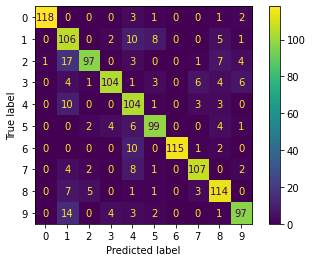

In [ ]:
train_dtree_confusion=confusion_matrix(y_train,train_dtree_pred)
disp_train_dtree=ConfusionMatrixDisplay(train_dtree_confusion)
disp_train_dtree.plot()
plt.show()

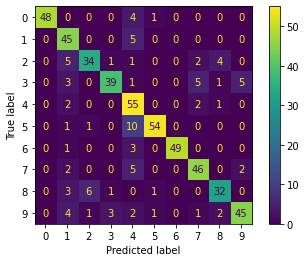

In [ ]:
test_dtree_confusion=confusion_matrix(y_test,test_dtree_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_dtree_confusion)
disp_test_dtree.plot()
plt.show()

In [ ]:
dtree_train_accurcy_score=accuracy_score(train_dtree_pred,y_train)
dtree_test_accuracy_score=accuracy_score(test_dtree_pred,y_test)
dtree_train_accurcy_score,dtree_test_accuracy_score

(0.8440731901352426, 0.8277777777777777)

In [ ]:
dtree_train_precision_score=precision_score(train_dtree_pred,y_train,average='macro')
dtree_test_precision_score=precision_score(test_dtree_pred,y_test,average='macro')
dtree_train_precision_score,dtree_test_precision_score

(0.8445560733667243, 0.8253925188917183)

In [ ]:
dtree_train_precision_score=precision_score(train_dtree_pred,y_train,average='weighted')
dtree_test_precision_score=precision_score(test_dtree_pred,y_test,average='weighted')
dtree_train_precision_score,dtree_test_precision_score

(0.8450748869009203, 0.8371645570787419)

In [ ]:
dtree_train_recall_score=recall_score(train_dtree_pred,y_train,average='macro')
dtree_test_recall_score=recall_score(test_dtree_pred,y_test,average='macro')
dtree_train_recall_score,dtree_test_recall_score

(0.856739047578726, 0.8451422119292376)

In [ ]:
dtree_train_recall_score=recall_score(train_dtree_pred,y_train,average='weighted')
dtree_test_recall_score=recall_score(test_dtree_pred,y_test,average='weighted')
dtree_train_recall_score,dtree_test_recall_score

(0.8440731901352426, 0.8277777777777777)

### Logestic regression

In [ ]:
train_lgr_pred=lgr_digits.predict(X_train)
test_lgr_pred=lgr_digits.predict(X_test)

In [ ]:
print(classification_report(y_train,train_lgr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



In [ ]:
print(classification_report(y_test,test_lgr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.98      0.99        60
           5       0.94      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.91      0.98      0.94        43
           9       0.98      0.95      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



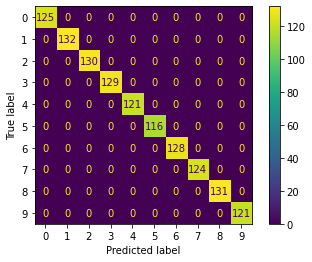

In [ ]:
train_lgr_confusion=confusion_matrix(y_train,train_lgr_pred)
disp_train_lgr=ConfusionMatrixDisplay(train_lgr_confusion)
disp_train_lgr.plot()
plt.show()

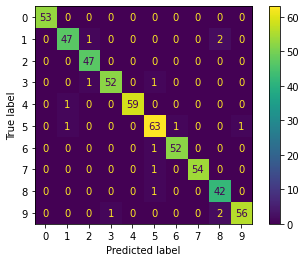

In [ ]:
test_lgr_confusion=confusion_matrix(y_test,test_lgr_pred)
disp_test_lgr=ConfusionMatrixDisplay(test_lgr_confusion)
disp_test_lgr.plot()
plt.show()

In [ ]:
lgr_train_accurcy_score=accuracy_score(train_lgr_pred,y_train)
lgr_test_accuracy_score=accuracy_score(test_lgr_pred,y_test)
lgr_train_accurcy_score,lgr_test_accuracy_score

(1.0, 0.9722222222222222)

In [ ]:
lgr_train_precision_score=precision_score(train_lgr_pred,y_train,average='macro')
lgr_test_precision_score=precision_score(test_lgr_pred,y_test,average='macro')
lgr_train_precision_score,lgr_test_precision_score

(1.0, 0.9729688736551022)

In [ ]:
lgr_train_precision_score=precision_score(train_lgr_pred,y_train,average='weighted')
lgr_test_precision_score=precision_score(test_lgr_pred,y_test,average='weighted')
lgr_train_precision_score,lgr_test_precision_score

(1.0, 0.9724414045367126)

In [ ]:
lgr_train_recall_score=recall_score(train_lgr_pred,y_train,average='macro')
lgr_test_recall_score=recall_score(test_lgr_pred,y_test,average='macro')
lgr_train_recall_score,lgr_test_recall_score

(1.0, 0.9716429623956604)

In [ ]:
lgr_train_recall_score=recall_score(train_lgr_pred,y_train,average='weighted')
lgr_test_recall_score=recall_score(test_lgr_pred,y_test,average='weighted')
lgr_train_recall_score,lgr_test_recall_score

(1.0, 0.9722222222222222)

### Support Vector Machine (SVM)

In [ ]:
train_svc_pred=svm_digits.predict(X_train)
test_svc_pred=svm_digits.predict(X_test)

In [ ]:
print(classification_report(y_train,train_svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



In [ ]:
print(classification_report(y_test,test_svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.97      0.97      0.97        66
           6       1.00      1.00      1.00        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



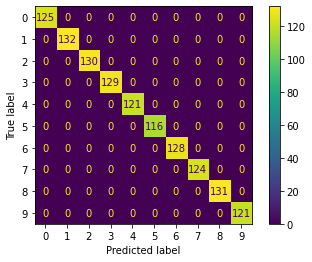

In [ ]:
train_svc_confusion=confusion_matrix(y_train,train_svc_pred)
disp_train_svc=ConfusionMatrixDisplay(train_svc_confusion)
disp_train_svc.plot()
plt.show()

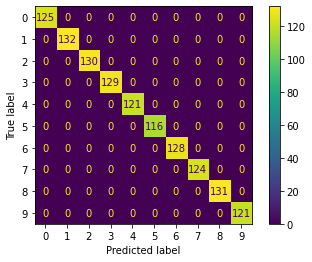

In [ ]:
train_svc_confusion=confusion_matrix(y_train,train_svc_pred)
disp_train_svc=ConfusionMatrixDisplay(train_svc_confusion)
disp_train_svc.plot()
plt.show()

In [ ]:
svc_train_accurcy_score=accuracy_score(train_svc_pred,y_train)
svc_test_accuracy_score=accuracy_score(test_svc_pred,y_test)
svc_train_accurcy_score,svc_test_accuracy_score

(1.0, 0.9796296296296296)

In [ ]:
svc_train_precision_score=precision_score(train_svc_pred,y_train,average='macro')
svc_test_precision_score=precision_score(test_svc_pred,y_test,average='macro')
svc_train_precision_score,svc_test_precision_score

(1.0, 0.980370817623084)

In [ ]:
svc_train_precision_score=precision_score(train_svc_pred,y_train,average='weighted')
svc_test_precision_score=precision_score(test_svc_pred,y_test,average='weighted')
svc_train_precision_score,svc_test_precision_score

(1.0, 0.9797842294436405)

In [ ]:
svc_train_recall_score=recall_score(train_svc_pred,y_train,average='macro')
svc_test_recall_score=recall_score(test_svc_pred,y_test,average='macro')
svc_train_recall_score,svc_test_recall_score

(1.0, 0.9796545379907448)

In [ ]:
svc_train_recall_score=recall_score(train_svc_pred,y_train,average='weighted')
svc_test_recall_score=recall_score(test_svc_pred,y_test,average='weighted')
svc_train_recall_score,svc_test_recall_score

(1.0, 0.9796296296296296)

In [ ]:
#accuracy score
pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_accuracy_score':[train_accurcy_score,dtree_train_accurcy_score,lgr_train_accurcy_score,svc_train_accurcy_score],
              'test_accuracy_score':[test_accuracy_score,dtree_test_accuracy_score,lgr_test_accuracy_score,svc_test_accuracy_score],
              'average_fit_time':['14.319875001907349 sec','2.287346839904785 sec', '27.216367959976196 sec','12.138502597808838 sec']})

,model,train_accuracy_score,test_accuracy_score,average_fit_time
0,KNN,1.000000,0.983333,14.319875001907349 sec
1,Dtree,0.844073,0.827778,2.287346839904785 sec
2,LGR,1.000000,0.972222,27.216367959976196 sec
3,SVM,1.000000,0.979630,12.138502597808838 sec


In [ ]:
#precision score
pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_precision_score':[train_precision_score,dtree_train_precision_score,lgr_train_precision_score,svc_train_precision_score],
              'test_precision_score':[test_precision_score,dtree_test_precision_score,lgr_test_precision_score,svc_test_precision_score],
              'Time_Elapsed':['14.319875001907349 sec','2.287346839904785 sec', '27.216367959976196 sec','12.138502597808838 sec']})

,model,train_precision_score,test_precision_score,Time_Elapsed
0,KNN,1.000000,0.983499,14.319875001907349 sec
1,Dtree,0.845075,0.837165,2.287346839904785 sec
2,LGR,1.000000,0.972441,27.216367959976196 sec
3,SVM,1.000000,0.979784,12.138502597808838 sec


In [ ]:
#recall score
pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_recall_score':[train_recall_score,dtree_train_recall_score,lgr_train_recall_score,svc_train_recall_score],
              'test_recall_score':[test_recall_score,dtree_test_recall_score,lgr_test_recall_score,svc_test_recall_score],
              'Time_Elapsed':['14.319875001907349 sec','2.287346839904785 sec', '27.216367959976196 sec','12.138502597808838 sec']})

,model,train_recall_score,test_recall_score,Time_Elapsed
0,KNN,1.000000,0.983333,14.319875001907349 sec
1,Dtree,0.844073,0.827778,2.287346839904785 sec
2,LGR,1.000000,0.972222,27.216367959976196 sec
3,SVM,1.000000,0.979630,12.138502597808838 sec
